In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import os
path = os.listdir('C:/Users/rohan/OneDrive/Desktop/Final Project/Code/input/brain-tumor-classification-mri/Training')
classes = {'no_tumor': 0, 'meningioma_tumor':1, 'glioma_tumor':2, 'pituitary_tumor':3}

In [3]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'C:/Users/rohan/OneDrive/Desktop/Final Project/Code/input/brain-tumor-classification-mri/Training/' + cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

np.unique(Y)

array([0, 1, 2, 3])

In [4]:
X = np.array(X)
Y = np.array(Y)

In [5]:
pd.Series(Y).value_counts()

3    827
2    826
1    822
0    395
dtype: int64

In [6]:
X.shape

(2870, 200, 200)

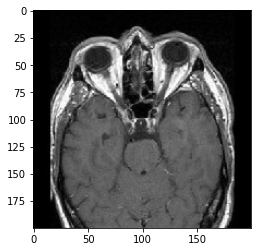

In [7]:
#with plt.xkcd():
plt.imshow(X[0], cmap='gray')

In [8]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(2870, 40000)

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=0.20)

In [10]:
xtrain.shape, xtest.shape

((2296, 40000), (574, 40000))

In [11]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [12]:
from sklearn.decomposition import PCA

In [13]:
print(xtrain.shape, xtest.shape)
pca = PCA(.98)
pca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)

(2296, 40000) (574, 40000)


In [14]:
pca_test.shape, pca_train.shape

((574, 1296), (2296, 1296))

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [16]:
lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

C:\Users\rohan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [17]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

In [18]:
pca_train.shape

(2296, 1296)

In [19]:
print("training score: ", lg.score(pca_train, ytrain))
print("testing score: ", lg.score(pca_test, ytest))

training score:  0.9969512195121951
testing score:  0.8153310104529616


In [20]:
print("training score: ", sv.score(pca_train, ytrain))
print("testing score: ", sv.score(pca_test, ytest))

training score:  0.9612369337979094
testing score:  0.8414634146341463


In [21]:
pca_test.shape

(574, 1296)

In [22]:
pred = sv.predict(pca_test)
np.where(ytest != pred)

(array([  3,   9,  11,  13,  20,  22,  28,  32,  37,  38,  42,  56,  61,
         66,  73,  75,  83,  84,  87,  88,  89,  91, 118, 125, 129, 133,
        144, 146, 158, 173, 174, 178, 187, 188, 193, 203, 204, 205, 206,
        210, 217, 220, 242, 246, 251, 261, 262, 263, 267, 268, 282, 291,
        300, 307, 312, 313, 316, 328, 331, 351, 356, 361, 368, 403, 421,
        423, 429, 432, 438, 441, 447, 453, 462, 463, 476, 480, 488, 497,
        498, 501, 512, 521, 522, 526, 533, 534, 537, 543, 550, 567, 570],
       dtype=int64),)

In [23]:
pred[6]

0

In [24]:
ytest[6]

0

In [25]:
dec = {'no_tumor': 0, 'meningioma_tumor':1, 'glioma_tumor':2, 'pituitary_tumor':3}

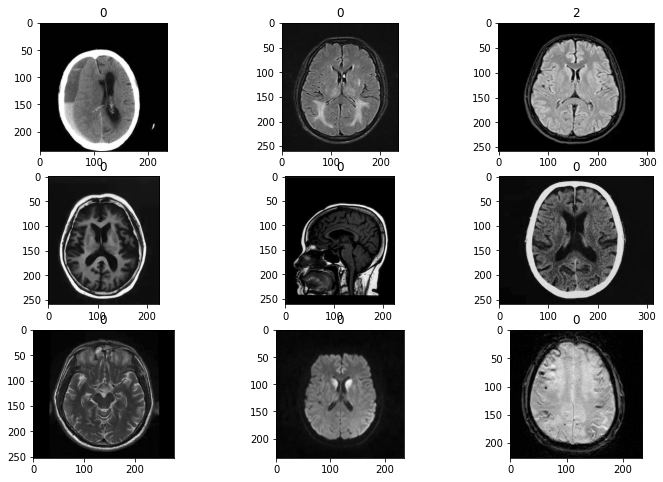

In [26]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/rohan/OneDrive/Desktop/Final Project/Code/input/brain-tumor-classification-mri/Testing/')
c=1


for i in os.listdir('C:/Users/rohan/OneDrive/Desktop/Final Project/Code/input/brain-tumor-classification-mri/Testing/no_tumor')[:9]:
    plt.subplot(3,3,c)

    img = cv2.imread('C:/Users/rohan/OneDrive/Desktop/Final Project/Code/input/brain-tumor-classification-mri/Testing/no_tumor/' + i, 0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    pca_test = pca.transform(img1)
    p = sv.predict(pca_test)
    plt.title(p[0])
    plt.imshow(img, cmap='gray')
    c+=1

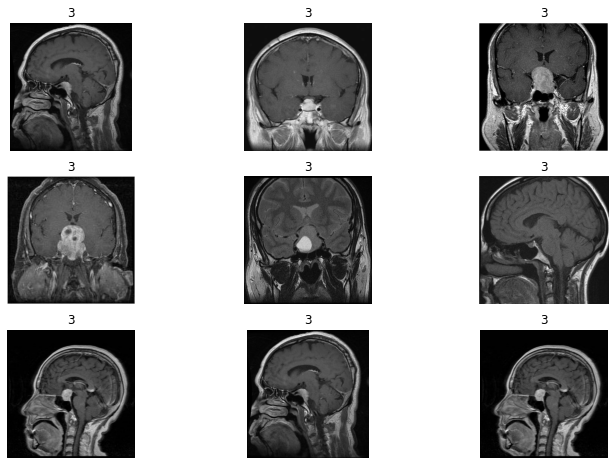

In [27]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/rohan/OneDrive/Desktop/Final Project/Code/input/brain-tumor-classification-mri/Testing')
c=1


for i in os.listdir('C:/Users/rohan/OneDrive/Desktop/Final Project/Code/input/brain-tumor-classification-mri/Testing/pituitary_tumor')[:9]:
    plt.subplot(3,3,c)
    img = cv2.imread('C:/Users/rohan/OneDrive/Desktop/Final Project/Code/input/brain-tumor-classification-mri/Testing/pituitary_tumor/' + i, 0)
    img1 = cv2.resize(img, (200,200))
    img1 = (img1.reshape(1,-1))/255
    pca_test = pca.transform(img1)
    p = sv.predict(pca_test)
    plt.title(p[0])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [28]:
def classification(upload):
    img = cv2.imread(upload,0)
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img1 = cv2.resize(img, (200,200))
                #         print(img1.shape)
    img1 = (img1.reshape(1,-1))/255
    pca_test = pca.transform(img1)
    #         print(pca_test.shape)
    p = sv.predict(pca_test)
    plt.title(p[0])

    if p==[2]:
        print(f'The SVC Model predicts that it is a Glioma tumor')
    elif p==[0]:
        print('The SVC model predicts that there is Meningioma tumor')
    elif p==[3]:
        print(f'The SVC Model predicts that it is a Pituitary tumor')
    else:
        print(f'no tumor')
        print(p)

The SVC Model predicts that it is a Glioma tumor


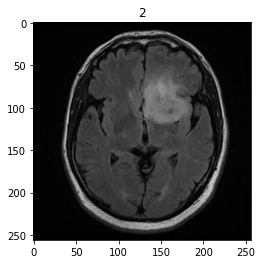

In [49]:
adahdagd = "C:/Users/rohan/OneDrive/Desktop/Final Project/Code/input/brain-tumor-classification-mri/Testing/glioma_tumor/image(6).jpg"
classification(adahdagd)
god =cv2.imread(adahdagd)
plt.imshow(god)

In [30]:
def classificationlg(upload):
    img = cv2.imread(upload,0)
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img1 = cv2.resize(img, (200,200))
                #         print(img1.shape)
    img1 = (img1.reshape(1,-1))/255
    pca_test = pca.transform(img1)
    #         print(pca_test.shape)
    p = sv.predict(pca_test)
    plt.title(p[0])

    if p==[2]:
        print(f'The Logit Model predicts that it is a Glioma tumor')
    elif p==[0]:
        print('The Logit model predicts that there is Meningioma tumor')
    elif p==[3]:
        print(f'The Logit Model predicts that it is a Pituitary tumor')
    else:
        print(f'no tumor')
        print(p)

The Logit Model predicts that it is a Pituitary tumor


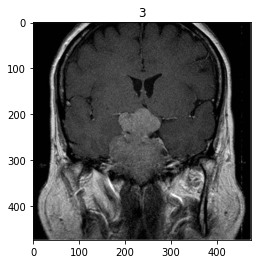

In [44]:
adahdagd = "C:/Users/rohan/OneDrive/Desktop/Final Project/Code/input/brain-tumor-classification-mri/Testing/pituitary_tumor/image(5).jpg"
classificationlg(adahdagd)
god =cv2.imread(adahdagd)
plt.imshow(god)